<a href="https://colab.research.google.com/github/sam2005-max/test_model_predict/blob/main/test_practice_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1001]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate
import plotly.express as px


In [1002]:
data = pd.read_csv('/content/fake_customer_data.csv')
data

,CustomerID,Gender,Age,Tenure,ServiceTier,MonthlyCharge,TotalCharges,NumSupportTickets,NumDeviceTypes,SatisfactionScore,Churn
0,1,male,34,11,premium,72.496236,797.458595,3,3,4,True
1,2,female,26,56,standard,40.575330,2272.218472,4,2,3,True
2,3,male,50,67,standard,43.550379,2917.875362,2,3,2,False
3,4,male,37,29,standard,51.594724,1496.247005,4,2,2,True
4,5,male,30,9,premium,86.249596,776.246362,1,2,1,False
...,...,...,...,...,...,...,...,...,...,...,...
995,996,male,42,30,standard,33.478592,1004.357745,4,2,5,False
996,997,male,26,24,basic,12.958134,310.995207,4,4,1,True
997,998,female,21,30,standard,22.681123,680.433695,4,2,2,True
998,999,female,31,7,standard,55.828767,390.801369,7,4,4,False


In [1003]:
def shape_of_data(data):
  print(data.shape)
shape_of_data(data)

(1000, 11)


In [1004]:
def data_info(data):
  data.info()
data_info(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         1000 non-null   int64  
 1   Gender             1000 non-null   object 
 2   Age                1000 non-null   int64  
 3   Tenure             1000 non-null   int64  
 4   ServiceTier        1000 non-null   object 
 5   MonthlyCharge      1000 non-null   float64
 6   TotalCharges       1000 non-null   float64
 7   NumSupportTickets  1000 non-null   int64  
 8   NumDeviceTypes     1000 non-null   int64  
 9   SatisfactionScore  1000 non-null   int64  
 10  Churn              1000 non-null   bool   
dtypes: bool(1), float64(2), int64(6), object(2)
memory usage: 79.2+ KB


In [1005]:
def description_of_data(data):
  print(data.describe())
description_of_data(data)

        CustomerID          Age       Tenure  MonthlyCharge  TotalCharges  \
count  1000.000000  1000.000000  1000.000000    1000.000000   1000.000000   
mean    500.500000    43.799000    34.569000      44.687210   1485.276444   
std     288.819436    15.133857    20.348103      28.708885   1350.265848   
min       1.000000    18.000000     1.000000      10.039293     12.794424   
25%     250.750000    31.000000    17.000000      17.605445    471.333446   
50%     500.500000    44.000000    33.500000      38.527190    983.088963   
75%     750.250000    57.000000    52.000000      70.632094   2187.079806   
max    1000.000000    69.000000    71.000000      99.950001   6863.881851   

       NumSupportTickets  NumDeviceTypes  SatisfactionScore  
count         1000.00000     1000.000000        1000.000000  
mean             4.92700        2.532000           3.047000  
std              2.09668        1.130599           1.417321  
min              0.00000        1.000000           1.00000

In [1006]:
def null_values(data):
  print(data.isnull().sum())
null_values(data)

CustomerID           0
Gender               0
Age                  0
Tenure               0
ServiceTier          0
MonthlyCharge        0
TotalCharges         0
NumSupportTickets    0
NumDeviceTypes       0
SatisfactionScore    0
Churn                0
dtype: int64


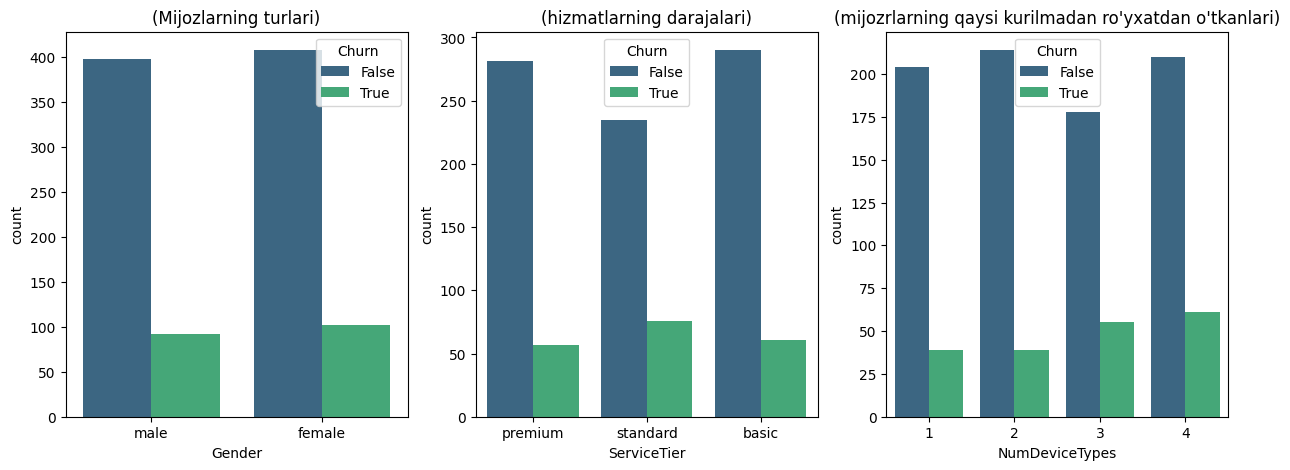

In [1007]:
fig, axes = plt. subplots (1,3, figsize=(15,5))
sns.countplot(x='Gender', hue='Churn', palette='viridis', data=data, ax=axes [0])
axes [0] .set_title("(Mijozlarning turlari)")
sns.countplot(x='ServiceTier', hue='Churn', palette='viridis', data=data, ax=axes [1])
axes [1]. set_title("(hizmatlarning darajalari)")
sns.countplot(x='NumDeviceTypes', hue='Churn', palette='viridis', data=data, ax=axes [2])
axes[2]. set_title("(mijozrlarning qaysi kurilmadan ro'yxatdan o'tkanlari)")
plt. show()

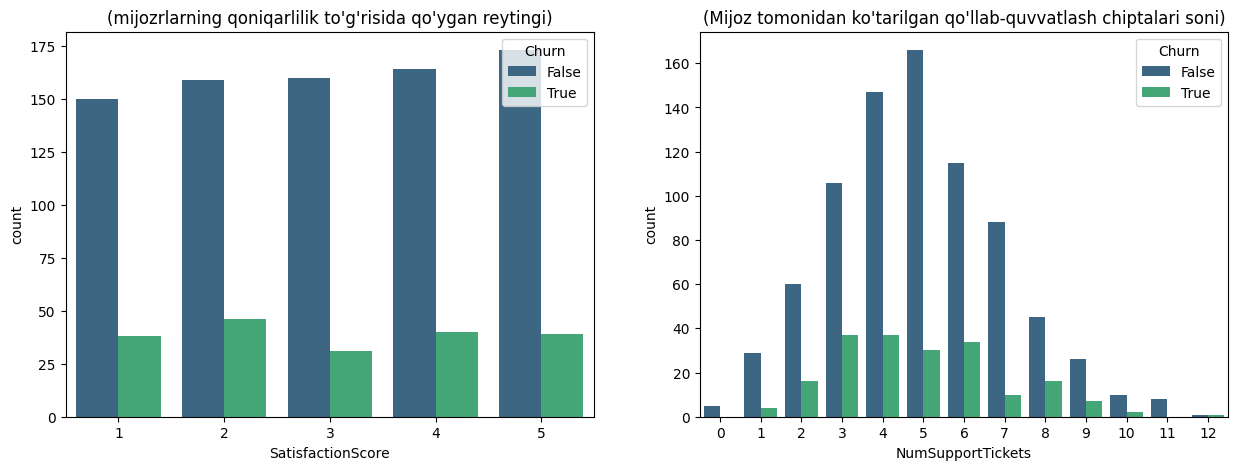

In [1008]:
fig, axes = plt. subplots (1,2, figsize=(15,5))
sns.countplot(x='SatisfactionScore', hue='Churn', palette='viridis', data=data, ax=axes [0])
axes [0] .set_title("(mijozrlarning qoniqarlilik to'g'risida qo'ygan reytingi)")
sns.countplot(x='NumSupportTickets', hue='Churn', palette='viridis', data=data, ax=axes [1])
axes [1]. set_title("(Mijoz tomonidan ko'tarilgan qo'llab-quvvatlash chiptalari soni)")

plt. show()

In [1009]:
data

,CustomerID,Gender,Age,Tenure,ServiceTier,MonthlyCharge,TotalCharges,NumSupportTickets,NumDeviceTypes,SatisfactionScore,Churn
0,1,male,34,11,premium,72.496236,797.458595,3,3,4,True
1,2,female,26,56,standard,40.575330,2272.218472,4,2,3,True
2,3,male,50,67,standard,43.550379,2917.875362,2,3,2,False
3,4,male,37,29,standard,51.594724,1496.247005,4,2,2,True
4,5,male,30,9,premium,86.249596,776.246362,1,2,1,False
...,...,...,...,...,...,...,...,...,...,...,...
995,996,male,42,30,standard,33.478592,1004.357745,4,2,5,False
996,997,male,26,24,basic,12.958134,310.995207,4,4,1,True
997,998,female,21,30,standard,22.681123,680.433695,4,2,2,True
998,999,female,31,7,standard,55.828767,390.801369,7,4,4,False


In [1010]:
def boolean_to_int_Curn_col(data):
  data['Churn'] = data['Churn'].replace({True: 1, False: 0})
boolean_to_int_Curn_col(data)

In [1011]:
data = data.drop(['CustomerID'], axis = 1)

In [1012]:
data

,Gender,Age,Tenure,ServiceTier,MonthlyCharge,TotalCharges,NumSupportTickets,NumDeviceTypes,SatisfactionScore,Churn
0,male,34,11,premium,72.496236,797.458595,3,3,4,1
1,female,26,56,standard,40.575330,2272.218472,4,2,3,1
2,male,50,67,standard,43.550379,2917.875362,2,3,2,0
3,male,37,29,standard,51.594724,1496.247005,4,2,2,1
4,male,30,9,premium,86.249596,776.246362,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...
995,male,42,30,standard,33.478592,1004.357745,4,2,5,0
996,male,26,24,basic,12.958134,310.995207,4,4,1,1
997,female,21,30,standard,22.681123,680.433695,4,2,2,1
998,female,31,7,standard,55.828767,390.801369,7,4,4,0


In [1013]:
# data['Churn'].value_counts()

In [1014]:
# data['Churn'].value_counts()/len(data)*100

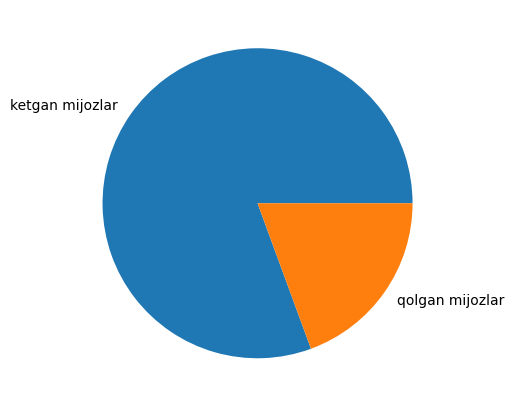

In [1015]:
churn_status = data['Churn'].value_counts()/len(data)*100
plt.figure(figsize = (5,8))
plt.pie(churn_status, labels = ['ketgan mijozlar','qolgan mijozlar'])
plt.show()

In [1016]:
data['Gender'] = data['Gender'].replace({'male': 1, 'female': 0})
data['ServiceTier'] = data['ServiceTier'].replace({'basic': 1, 'premium': 0, 'standard': 2})

In [1017]:
# df1 = []
# df2 = []
# num1 = 0
# for i in data['Churn']:
#   if i == 1:
#     df1.append(data.iloc[num1])
#   num1 += 1

# num2 = 0
# ran = len(df1)
# for i in data['Churn']:
#   if i == 0:
#     df2.append(data.iloc[num2])
#   num2 += 1
#   if len(df2) >= ran+ran:
#     break
# df = []
# n = 0
# for i in df1:
#   df.append(df1[n])
#   df.append(df2[n])
#   n += 1
# df = pd.DataFrame(df)
# df["Churn"].value_counts()

In [1018]:
df = data

In [1019]:
# churn_status_df = df['Churn'].value_counts()/len(data)*100
# plt.figure(figsize = (5,8))
# plt.pie(churn_status_df, labels = ['ketgan mijozlar','qolgan mijozlar'])
# plt.show()

In [1020]:
# df = pd.get_dummies(df)
# df.head()

In [1021]:
df.corrwith(df['Churn']).abs().sort_values(ascending=False)

Churn                1.000000
NumDeviceTypes       0.077861
ServiceTier          0.076129
SatisfactionScore    0.023418
Tenure               0.020220
NumSupportTickets    0.016699
Gender               0.015480
MonthlyCharge        0.014882
TotalCharges         0.008288
Age                  0.002507
dtype: float64

In [1022]:
# df = df.drop(['CustomerID'], axis = 1)
# df['MonthlyCharge'] = df['MonthlyCharge'].astype(int)
# df['TotalCharges'] = df['TotalCharges'].astype(int)
df['Gender'] = df['Gender'].astype(int)
df['Age'] = df['Age'].astype(int)
df['Churn'] = df['Churn'].astype(int)
df['Tenure'] = df['Tenure'].astype(int)
df['ServiceTier'] = df['ServiceTier'].astype(int)
df['NumSupportTickets'] = df['NumSupportTickets'].astype(int)
df['NumDeviceTypes'] = df['NumDeviceTypes'].astype(int)
df['SatisfactionScore'] = df['SatisfactionScore'].astype(int)

In [1023]:
df

,Gender,Age,Tenure,ServiceTier,MonthlyCharge,TotalCharges,NumSupportTickets,NumDeviceTypes,SatisfactionScore,Churn
0,1,34,11,0,72.496236,797.458595,3,3,4,1
1,0,26,56,2,40.575330,2272.218472,4,2,3,1
2,1,50,67,2,43.550379,2917.875362,2,3,2,0
3,1,37,29,2,51.594724,1496.247005,4,2,2,1
4,1,30,9,0,86.249596,776.246362,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...
995,1,42,30,2,33.478592,1004.357745,4,2,5,0
996,1,26,24,1,12.958134,310.995207,4,4,1,1
997,0,21,30,2,22.681123,680.433695,4,2,2,1
998,0,31,7,2,55.828767,390.801369,7,4,4,0


In [1024]:
df = pd.get_dummies(df, columns = ['ServiceTier'])



In [1025]:
df

,Gender,Age,Tenure,MonthlyCharge,TotalCharges,NumSupportTickets,NumDeviceTypes,SatisfactionScore,Churn,ServiceTier_0,ServiceTier_1,ServiceTier_2
0,1,34,11,72.496236,797.458595,3,3,4,1,1,0,0
1,0,26,56,40.575330,2272.218472,4,2,3,1,0,0,1
2,1,50,67,43.550379,2917.875362,2,3,2,0,0,0,1
3,1,37,29,51.594724,1496.247005,4,2,2,1,0,0,1
4,1,30,9,86.249596,776.246362,1,2,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,42,30,33.478592,1004.357745,4,2,5,0,0,0,1
996,1,26,24,12.958134,310.995207,4,4,1,1,0,1,0
997,0,21,30,22.681123,680.433695,4,2,2,1,0,0,1
998,0,31,7,55.828767,390.801369,7,4,4,0,0,0,1


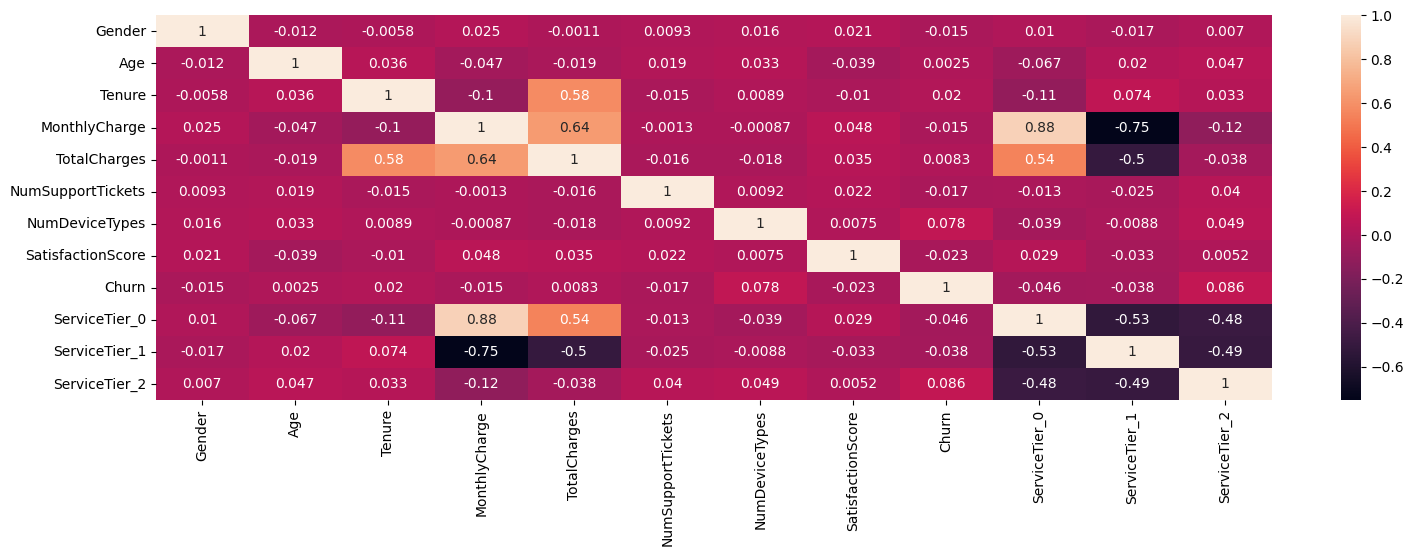

In [1026]:
def compute_correlations_matrix_with_seaborn_visualization(data):
  cor=data.corr()
  plt.subplots(figsize=(18,5))
  sns.heatmap(cor,annot=True)
compute_correlations_matrix_with_seaborn_visualization(df)

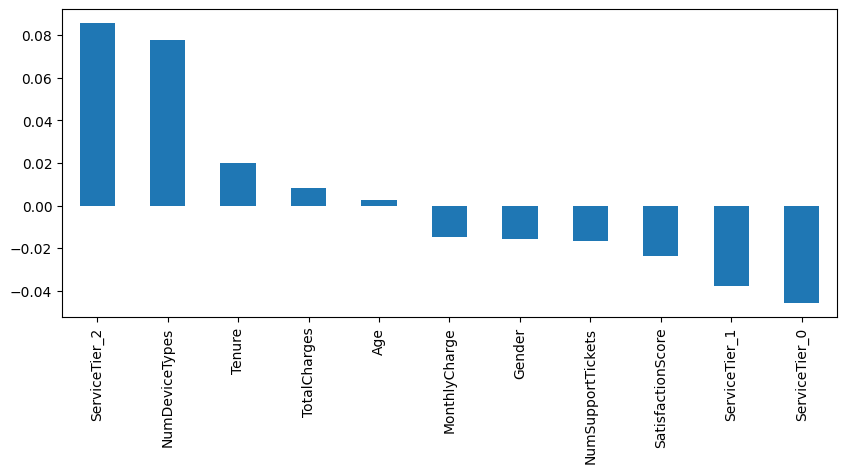

In [1027]:
conti_df= df.select_dtypes(exclude=[object])
corr_with_tot_count = conti_df.corr()["Churn"].sort_values(ascending=False)
plt.figure(figsize=(10,4))
corr_with_tot_count.drop("Churn").plot.bar()
plt.show()

In [1028]:
# Ma'lumotlarni "Kredit statusiga" bo'lan matematik nisbatini aniqlaymiz"
df.corrwith(df['Churn']).abs().sort_values(ascending=False)

Churn                1.000000
ServiceTier_2        0.085585
NumDeviceTypes       0.077861
ServiceTier_0        0.045828
ServiceTier_1        0.037588
SatisfactionScore    0.023418
Tenure               0.020220
NumSupportTickets    0.016699
Gender               0.015480
MonthlyCharge        0.014882
TotalCharges         0.008288
Age                  0.002507
dtype: float64

In [1029]:
X = df.drop(['Churn'],axis=1)
y = df['Churn']
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(X)
# X = scaler.transform(X)
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=5)

In [1030]:
X

,Gender,Age,Tenure,MonthlyCharge,TotalCharges,NumSupportTickets,NumDeviceTypes,SatisfactionScore,ServiceTier_0,ServiceTier_1,ServiceTier_2
0,1,34,11,72.496236,797.458595,3,3,4,1,0,0
1,0,26,56,40.575330,2272.218472,4,2,3,0,0,1
2,1,50,67,43.550379,2917.875362,2,3,2,0,0,1
3,1,37,29,51.594724,1496.247005,4,2,2,0,0,1
4,1,30,9,86.249596,776.246362,1,2,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
995,1,42,30,33.478592,1004.357745,4,2,5,0,0,1
996,1,26,24,12.958134,310.995207,4,4,1,0,1,0
997,0,21,30,22.681123,680.433695,4,2,2,0,0,1
998,0,31,7,55.828767,390.801369,7,4,4,0,0,1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

              precision    recall  f1-score   support

           0       0.81      1.00      0.89       161
           1       0.00      0.00      0.00        39

    accuracy                           0.81       200
   macro avg       0.40      0.50      0.45       200
weighted avg       0.65      0.81      0.72       200

Model aniqligi: 0.805


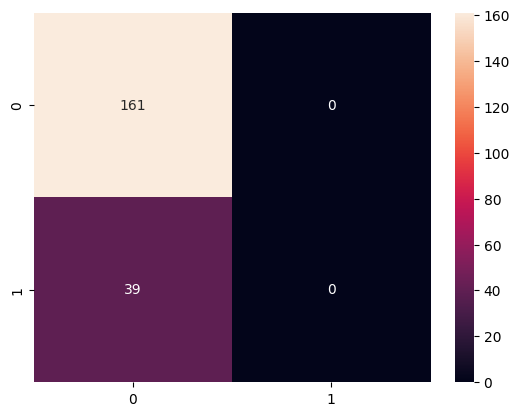

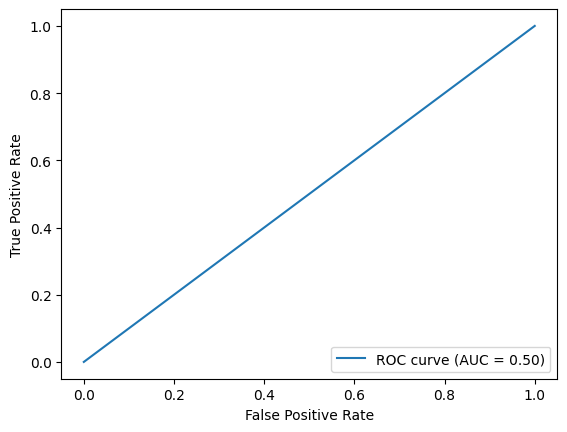

In [1031]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn import metrics
# Modelni yaratamiz (training)
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = LR_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.81      1.00      0.89       161
           1       0.00      0.00      0.00        39

    accuracy                           0.81       200
   macro avg       0.40      0.50      0.45       200
weighted avg       0.65      0.81      0.72       200

Model aniqligi: 0.805


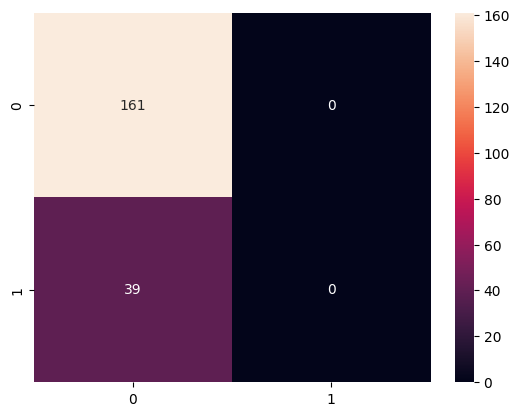

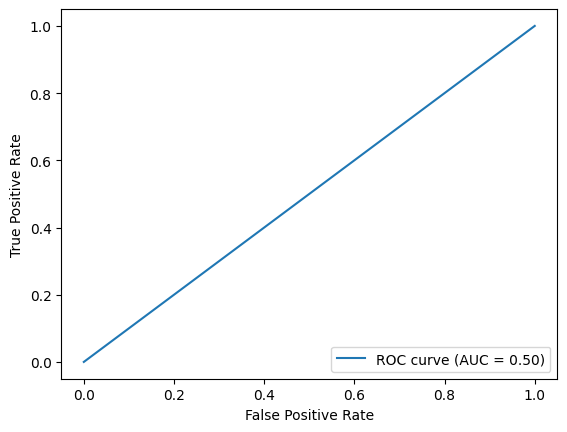

In [1032]:
import numpy as np
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# Modelni yaratamiz (training)
svm_model = SVC()
svm_model.fit(X_train, y_train)
# Modelni baholaymiz
y_pred = svm_model. predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))
## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns. heatmap(conf_mat, annot=True, fmt="g")
plt. show()
## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt. show()

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       161
           1       0.30      0.36      0.33        39

    accuracy                           0.71       200
   macro avg       0.57      0.58      0.57       200
weighted avg       0.73      0.71      0.72       200

Model aniqligi: 0.71


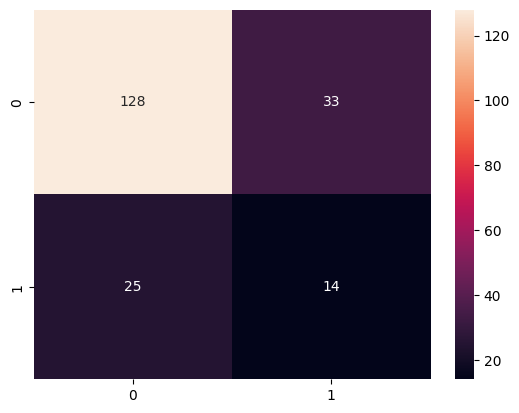

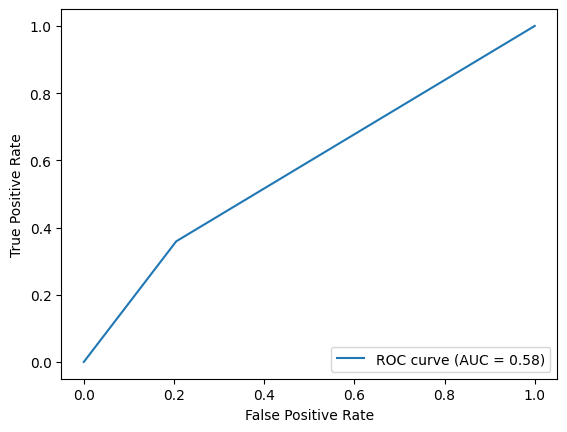

In [1033]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Modelni yaratamiz (training)
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = tree_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

In [1034]:
import tensorflow as tf
from tensorflow import keras
# model = keras.models.Sequential([
#     keras.layers.Dense(512, activation="relu", input_shape=(X_train.shape[1],)),
#     keras.layers.Dropout(0.2),
#     keras.layers.Dense(256,activation="relu"),
#     keras.layers.Dropout(0.2),
#     keras.layers.Dense(128,activation="relu"),
#     keras.layers.Dropout(0.2),
#     keras.layers.Dense(64,activation="relu"),
#     keras.layers.Dropout(0.2),
#     keras.layers.Dense(10, activation="softmax"),
#     ])

In [1035]:
X

,Gender,Age,Tenure,MonthlyCharge,TotalCharges,NumSupportTickets,NumDeviceTypes,SatisfactionScore,ServiceTier_0,ServiceTier_1,ServiceTier_2
0,1,34,11,72.496236,797.458595,3,3,4,1,0,0
1,0,26,56,40.575330,2272.218472,4,2,3,0,0,1
2,1,50,67,43.550379,2917.875362,2,3,2,0,0,1
3,1,37,29,51.594724,1496.247005,4,2,2,0,0,1
4,1,30,9,86.249596,776.246362,1,2,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
995,1,42,30,33.478592,1004.357745,4,2,5,0,0,1
996,1,26,24,12.958134,310.995207,4,4,1,0,1,0
997,0,21,30,22.681123,680.433695,4,2,2,0,0,1
998,0,31,7,55.828767,390.801369,7,4,4,0,0,1


In [1046]:
# from keras.models import Sequential
# from keras.layers import Dense
# import tensorflow as tf
# from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# from sklearn.preprocessing import MinMaxScaler


In [1047]:
# scaler = MinMaxScaler()
# scaler.fit(df)
# X = scaler.transform(df)

In [1049]:
# basic_model = Sequential()

In [1050]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [1040]:
# basic_model.add(Dense(units=16, activation='relu', input_shape=(13,)))

In [1051]:
# basic_model.add(Dense(1, activation='sigmoid'))

In [1052]:
# adam = keras.optimizers.Adam(learning_rate=0.001)

In [1053]:
# basic_model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])

In [1054]:
# basic_model.fit(X_train, y_train, epochs=100)

In [1055]:
# X_train

In [1056]:
# loss_and_metrics = basic_model.evaluate(X_test, y_test)
# print(loss_and_metrics)
# print('Loss = ',loss_and_metrics[0])
# print('Accuracy = ',loss_and_metrics[1])

In [1057]:
# predicted = basic_model.predict(X_test)

In [1058]:
# predicted = tf.squeeze(predicted)
# predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
# actual = np.array(y_test)
# conf_mat = confusion_matrix(actual, predicted)
# displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
# displ.plot()